<a href="https://www.kaggle.com/code/manubindra/pokemon-data-set?scriptVersionId=185470788" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Loading Libraries and Reading the Data 

In [2]:
df = pd.read_csv("/kaggle/input/pokemon/Pokemon.csv")

In [3]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


**Type 2 has quite a lot N/A, whcih shows that alot of Pokemons are single type Pokemon**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


**getting rid of the unnecessary columns**

In [5]:

df.drop('#',axis = 1,inplace = True)

In [6]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Composition of Legendary Type Pokemon

<Axes: ylabel='count'>

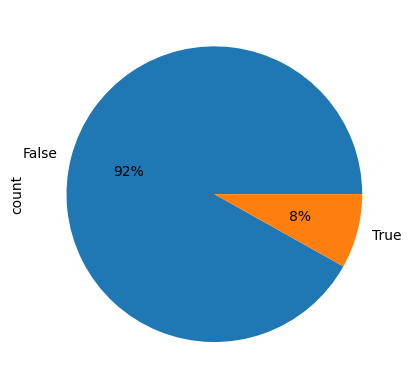

In [7]:
Legend_status = df['Legendary'].value_counts()
Legend_status
Legend_status.plot.pie(autopct = '%0.f%%')

In [8]:
df['Type 2'].fillna('Normal',inplace= True)

df['Combined Type'] = df['Type 1']+'-'+df['Type 2']
df['Combined Type'].isna().count()
df['Combined Type'] = df['Combined Type'].replace('Normal-Normal','Normal')

/tmp/ipykernel_18/2540325557.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Types of Pokemon
1. **for any Type 2 which is Normal can be considered that it is only one Type**
2. **Bug_Poison is the only type pokemon which has two type Pokemon**

Text(0.5, 0, 'Pokemon Types')

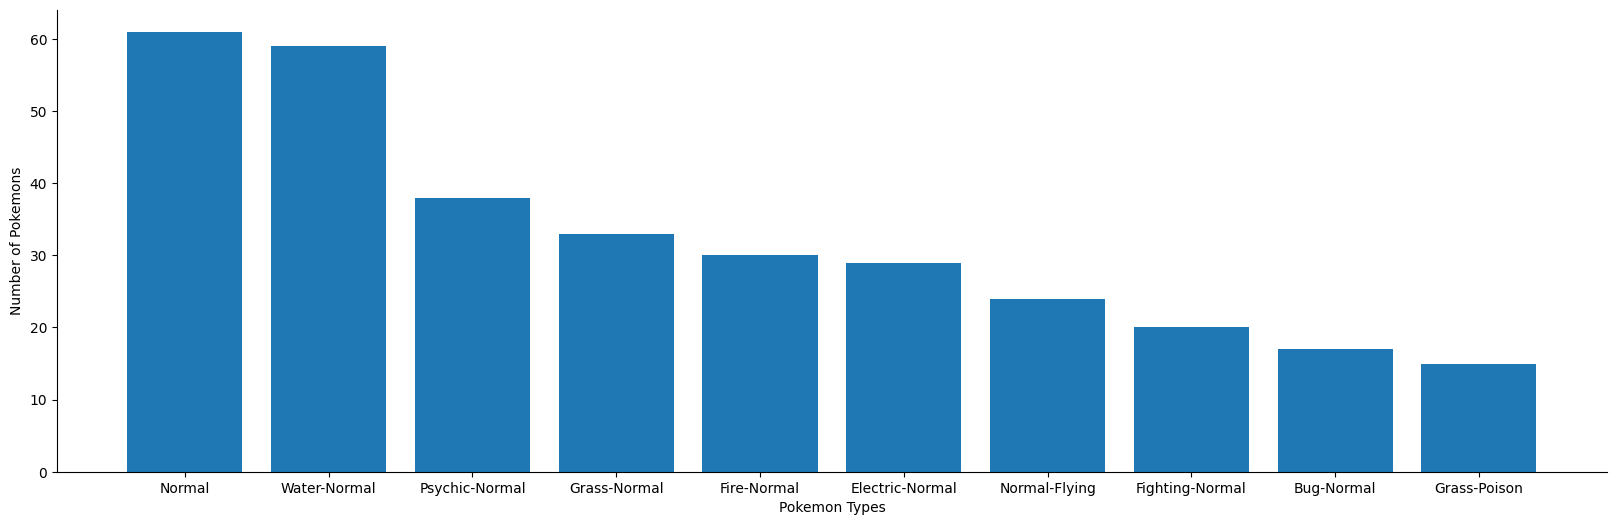

In [9]:
Top_Pokemons_by_Type = df['Combined Type'].value_counts().head(10)
fig,ax = plt.subplots(figsize = (20,6))
ax.bar(Top_Pokemons_by_Type.index,Top_Pokemons_by_Type)
ax.spines[['top','right']].set_visible(False)
ax.set_ylabel('Number of Pokemons')
ax.set_xlabel('Pokemon Types')

# To understand the Correlation for each aspect
1. **Total has the highest correlation with Sp. Atk and Sp. Defense**
2. **Top rated Pokemon would be with the highest Sp. Atk and Sp. Def**

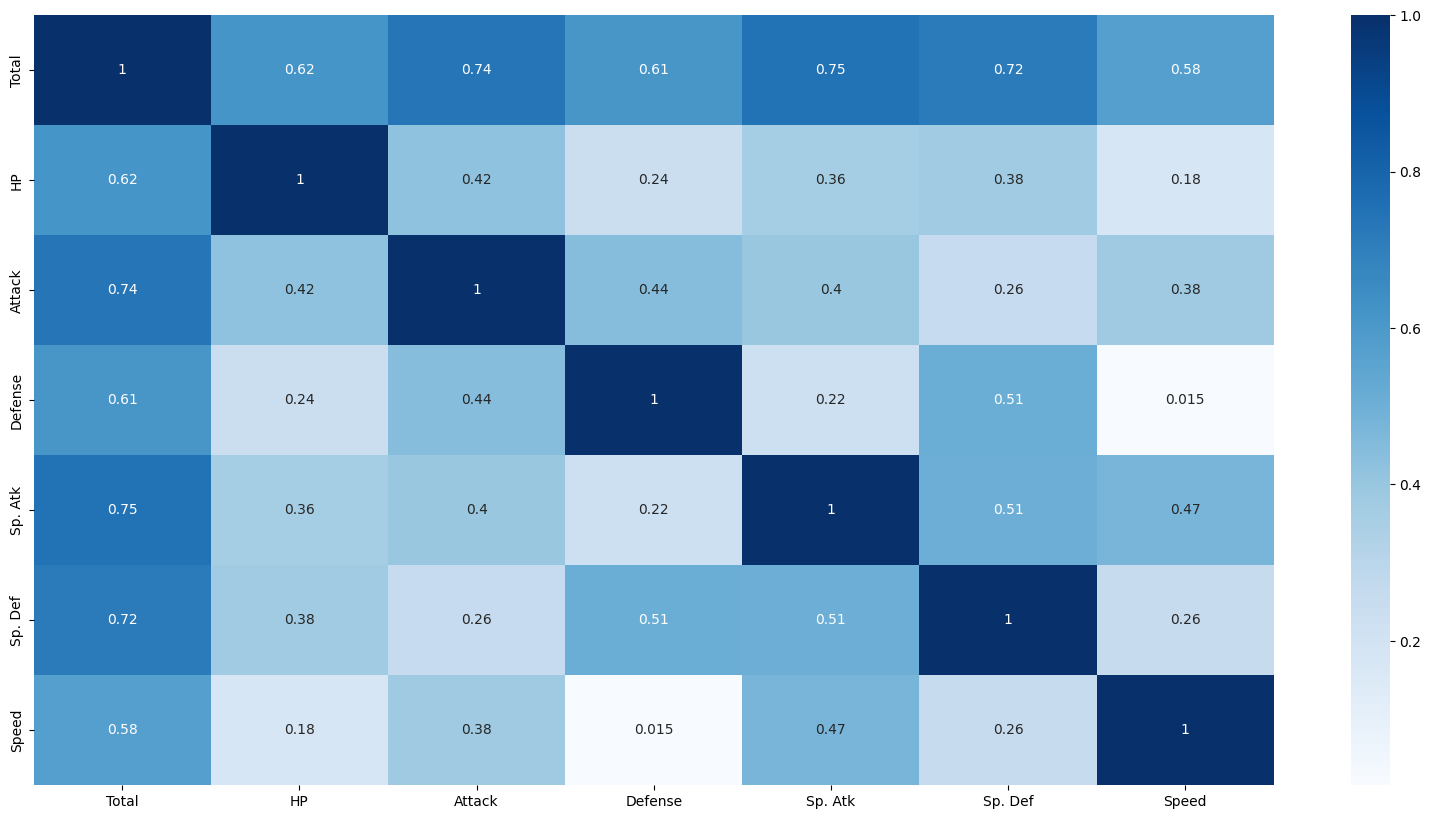

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
corr = df.drop(['Name','Legendary','Generation','Type 1','Type 2','Generation','Legendary','Combined Type'], axis = 1).corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

# Pokemon by Max

In [11]:
df.loc[df['Sp. Atk'].idxmax()]

Name             MewtwoMega Mewtwo Y
Type 1                       Psychic
Type 2                        Normal
Total                            780
HP                               106
Attack                           150
Defense                           70
Sp. Atk                          194
Sp. Def                          120
Speed                            140
Generation                         1
Legendary                       True
Combined Type         Psychic-Normal
Name: 164, dtype: object

In [12]:
df.loc[df['Sp. Def'].idxmax()]


Name              Shuckle
Type 1                Bug
Type 2               Rock
Total                 505
HP                     20
Attack                 10
Defense               230
Sp. Atk                10
Sp. Def               230
Speed                   5
Generation              2
Legendary           False
Combined Type    Bug-Rock
Name: 230, dtype: object

In [13]:
df.loc[df['HP'].idxmax()]

Name             Blissey
Type 1            Normal
Type 2            Normal
Total                540
HP                   255
Attack                10
Defense               10
Sp. Atk               75
Sp. Def              135
Speed                 55
Generation             2
Legendary          False
Combined Type     Normal
Name: 261, dtype: object

In [14]:
df.loc[df['Attack'].idxmax()]

Name             MewtwoMega Mewtwo X
Type 1                       Psychic
Type 2                      Fighting
Total                            780
HP                               106
Attack                           190
Defense                          100
Sp. Atk                          154
Sp. Def                          100
Speed                            130
Generation                         1
Legendary                       True
Combined Type       Psychic-Fighting
Name: 163, dtype: object

In [15]:
df.loc[df['Defense'].idxmax()]

Name             SteelixMega Steelix
Type 1                         Steel
Type 2                        Ground
Total                            610
HP                                75
Attack                           125
Defense                          230
Sp. Atk                           55
Sp. Def                           95
Speed                             30
Generation                         2
Legendary                      False
Combined Type           Steel-Ground
Name: 224, dtype: object

In [16]:
df.loc[df['Speed'].idxmax()]

Name             DeoxysSpeed Forme
Type 1                     Psychic
Type 2                      Normal
Total                          600
HP                              50
Attack                          95
Defense                         90
Sp. Atk                         95
Sp. Def                         90
Speed                          180
Generation                       3
Legendary                     True
Combined Type       Psychic-Normal
Name: 431, dtype: object

# Comparison for Top 5 by Type and Legendary Status

In [17]:
mask = (df['Legendary'] == False) & (df['Combined Type']== 'Normal')
top_normal_Pokemons = df[mask].sort_values(by = 'Total',ascending = False)
top5_normal_all_data = top_normal_Pokemons.set_index('Name', drop = True).head(5)
top5_normal_all_data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combined Type
Name,,,,,,,,,,,,
Slaking,Normal,Normal,670,150,160,100,95,65,100,3,False,Normal
KangaskhanMega Kangaskhan,Normal,Normal,590,105,125,100,60,100,100,1,False,Normal
Blissey,Normal,Normal,540,255,10,10,75,135,55,2,False,Normal
Snorlax,Normal,Normal,540,160,110,65,65,110,30,1,False,Normal
Porygon-Z,Normal,Normal,535,85,80,70,135,75,90,4,False,Normal


In [18]:
top5_normal = top5_normal_all_data.drop(['Type 1','Type 2','Total','Generation','Legendary','Combined Type'], axis = 1)

In [19]:
mask = (df['Legendary'] == True) 
top_normal_Pokemons = df[mask].sort_values(by = 'Total',ascending = False)
to5_legend_all_data = top_normal_Pokemons.set_index('Name', drop = True).head(5)
to5_legend_all_data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combined Type
Name,,,,,,,,,,,,
MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Psychic-Fighting
MewtwoMega Mewtwo Y,Psychic,Normal,780,106,150,70,194,120,140,1,True,Psychic-Normal
RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,Dragon-Flying
KyogrePrimal Kyogre,Water,Normal,770,100,150,90,180,160,90,3,True,Water-Normal
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,Ground-Fire


In [20]:
cat = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
        r = [to5_legend_all_data['HP'].values[0],to5_legend_all_data['Attack'].values[0],to5_legend_all_data['Defense'].values[0],to5_legend_all_data['Sp. Atk'].values[0],to5_legend_all_data['Sp. Def'].values[0],to5_legend_all_data['Speed'].values[0],to5_legend_all_data["HP"].values[0]],
        theta = cat,
        mode = 'lines',
        name = to5_legend_all_data.index[0],
        line_color = 'peru'
    ))
fig.add_trace(go.Scatterpolar(
        r = [to5_legend_all_data['HP'].values[1],to5_legend_all_data['Attack'].values[1],to5_legend_all_data['Defense'].values[1],to5_legend_all_data['Sp. Atk'].values[1],to5_legend_all_data['Sp. Def'].values[1],to5_legend_all_data['Speed'].values[1],to5_legend_all_data["HP"].values[1]],
        theta = cat,
        mode = 'lines',
        name = to5_legend_all_data.index[1],
        line_color = 'darkviolet'
    ))
fig.add_trace(go.Scatterpolar(
        r = [to5_legend_all_data['HP'].values[2],to5_legend_all_data['Attack'].values[2],to5_legend_all_data['Defense'].values[2],to5_legend_all_data['Sp. Atk'].values[2],to5_legend_all_data['Sp. Def'].values[2],to5_legend_all_data['Speed'].values[2],to5_legend_all_data["HP"].values[2]],
        theta = cat,
        mode = 'lines',
        name = to5_legend_all_data.index[2],
        line_color = 'black'
    ))

fig.add_trace(go.Scatterpolar(
        r = [to5_legend_all_data['HP'].values[3],to5_legend_all_data['Attack'].values[3],to5_legend_all_data['Defense'].values[3],to5_legend_all_data['Sp. Atk'].values[3],to5_legend_all_data['Sp. Def'].values[3],to5_legend_all_data['Speed'].values[3],to5_legend_all_data["HP"].values[3]],
        theta = cat,
        mode = 'lines',
        name = to5_legend_all_data.index[3],
        line_color = 'orange'
    ))
fig.add_trace(go.Scatterpolar(
        r = [to5_legend_all_data['HP'].values[4],to5_legend_all_data['Attack'].values[4],to5_legend_all_data['Defense'].values[4],to5_legend_all_data['Sp. Atk'].values[4],to5_legend_all_data['Sp. Def'].values[4],to5_legend_all_data['Speed'].values[4],to5_legend_all_data["HP"].values[4]],
        theta = cat,
        mode = 'lines',
        name = to5_legend_all_data.index[4],
        line_color = 'yellow'
    ))


fig.update_layout(
    title = f'Top 5 Legend Type Pokemon',
    showlegend = True,
    
    
)

fig.show()

In [21]:
def radr(x):
    cat = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
        r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
        theta = cat,
        mode = 'lines',
        name = x.index[0],
        line_color = 'peru'
         ))
        
    fig.add_trace(go.Scatterpolar(
        r = [x['HP'].values[1],x['Attack'].values[1],x['Defense'].values[1],x['Sp. Atk'].values[1],x['Sp. Def'].values[1],x['Speed'].values[1],x["HP"].values[1]],
        theta = cat,
        mode = 'lines',
        name = x.index[1],
        line_color = 'green'
         ))
    
    fig.add_trace(go.Scatterpolar(
        r = [x['HP'].values[2],x['Attack'].values[2],x['Defense'].values[2],x['Sp. Atk'].values[2],x['Sp. Def'].values[2],x['Speed'].values[2],x["HP"].values[2]],
        theta = cat,
        mode = 'lines',
        name = x.index[2],
        line_color = 'blue'
         ))
    
    fig.add_trace(go.Scatterpolar(
        r = [x['HP'].values[3],x['Attack'].values[3],x['Defense'].values[3],x['Sp. Atk'].values[3],x['Sp. Def'].values[3],x['Speed'].values[3],x["HP"].values[3]],
        theta = cat,
        mode = 'lines',
        name = x.index[3],
        line_color = 'red'
         ))
        
    fig.add_trace(go.Scatterpolar(
        r = [x['HP'].values[4],x['Attack'].values[4],x['Defense'].values[4],x['Sp. Atk'].values[4],x['Sp. Def'].values[4],x['Speed'].values[4],x["HP"].values[4]],
        theta = cat,
        mode = 'lines',
        name = x.index[4],
        line_color = 'black'
        
    ))
    fig.update_layout(
        title = f'Top 5 {x["Type 1"][0]} Type Pokemon',
        polar = dict(
            radialaxis = dict(
                visible = False
        )
      ),
      showlegend = True
    )
    

    fig.show()

In [22]:
mask = (df['Type 1'] == 'Fire')
top_fire_Pokemons = df[mask].sort_values(by = 'Total',ascending = False)
top5_fire_all_data = top_fire_Pokemons.set_index('Name', drop = True).head(5)
top5_fire_all_data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combined Type
Name,,,,,,,,,,,,
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Fire-Flying
CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,Fire-Dragon
CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,Fire-Flying
BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False,Fire-Fighting
Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,Fire-Water


In [23]:
mask = (df['Type 1'] == 'Grass')
top_grass_Pokemons = df[mask].sort_values(by = 'Total',ascending = False)
top5_grass_all_data = top_grass_Pokemons.set_index('Name', drop = True).head(5)
top5_grass_all_data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combined Type
Name,,,,,,,,,,,,
SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False,Grass-Dragon
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass-Poison
ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True,Grass-Flying
ShayminLand Forme,Grass,Normal,600,100,100,100,100,100,100,4,True,Grass-Normal
AbomasnowMega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,False,Grass-Ice


In [24]:
mask = (df['Type 1'] == 'Water')
top_water_Pokemons = df[mask].sort_values(by = 'Total',ascending = False)
top5_water_all_data = top_water_Pokemons.set_index('Name', drop = True).head(5)
top5_water_all_data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combined Type
Name,,,,,,,,,,,,
KyogrePrimal Kyogre,Water,Normal,770,100,150,90,180,160,90,3,True,Water-Normal
Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True,Water-Dragon
Kyogre,Water,Normal,670,100,100,90,150,140,90,3,True,Water-Normal
GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False,Water-Dark
SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False,Water-Ground


In [25]:
mask = (df['Type 1'] == 'Ice')
top_ice_Pokemons = df[mask].sort_values(by = 'Total',ascending = False)
top5_ice_all_data = top_ice_Pokemons.set_index('Name', drop = True).head(5)
top5_ice_all_data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combined Type
Name,,,,,,,,,,,,
Regice,Ice,Normal,580,80,50,100,100,200,50,3,True,Ice-Normal
GlalieMega Glalie,Ice,Normal,580,80,120,80,120,80,100,3,False,Ice-Normal
Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,Ice-Flying
Vanilluxe,Ice,Normal,535,71,95,85,110,95,79,5,False,Ice-Normal
Mamoswine,Ice,Ground,530,110,130,80,70,60,80,4,False,Ice-Ground


In [26]:

mask = (df['Type 1'] == 'Ground')
top_Ground_Pokemons = df[mask].sort_values(by = 'Total',ascending = False)
top5_Ground_all_data = top_Ground_Pokemons.set_index('Name', drop = True).head(5)
top5_Ground_all_data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combined Type
Name,,,,,,,,,,,,
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,Ground-Fire
Groudon,Ground,Normal,670,100,150,140,100,90,90,3,True,Ground-Normal
LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True,Ground-Flying
LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True,Ground-Flying
Rhyperior,Ground,Rock,535,115,140,130,55,55,40,4,False,Ground-Rock


In [27]:

radr(top5_grass_all_data),radr(top5_fire_all_data),radr(top5_water_all_data),radr(top5_ice_all_data),radr(top5_Ground_all_data)

/tmp/ipykernel_18/4292501497.py:45: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



(None, None, None, None, None)

# Regrsssion between HP and other stats

<Axes: xlabel='HP', ylabel='Total'>

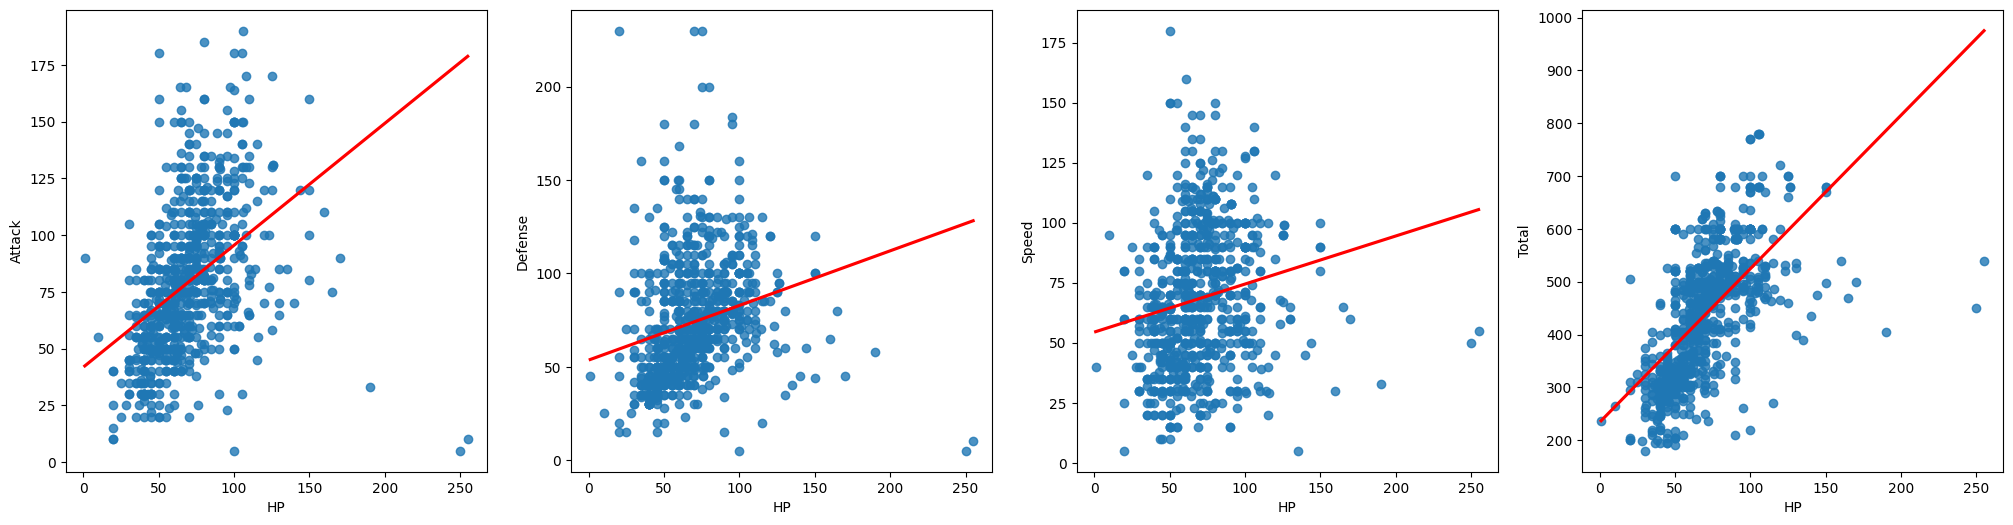

In [28]:
fig,(ax,ax1,ax2,ax3) = plt.subplots(ncols = 4,figsize=(25,6))

sns.regplot(x=df['HP'], y=df['Attack'], ci=None, data=df, line_kws = {"color": "red"},ax= ax)
sns.regplot(x=df['HP'], y=df['Defense'], ci=None, data=df, line_kws = {"color": "red"},ax = ax1)
sns.regplot(x=df['HP'], y=df['Speed'], ci=None, data=df, line_kws = {"color": "red"},ax = ax2)
sns.regplot(x=df['HP'], y=df['Total'], ci=None, data=df, line_kws = {"color": "red"},ax = ax3)

# Taking Mean for all the Stats and Non Legendary Type to get the best Pokemons

In [29]:
med_weight = df.set_index('Name', drop = True).head(5).drop(['Type 1','Type 2','Total','Generation','Legendary','Combined Type'], axis = 1).mean(axis =0)
mw = pd.DataFrame(med_weight).T
mw

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,60.8,69.0,72.2,85.4,83.0,66.0


In [30]:
mask = (df['Legendary'] == False) & (df['HP']>=mw['HP'].values[0]) & (df['Attack']>=mw['Attack'].values[0]) & (df['Defense']>=mw['Defense'].values[0])  & (df['Sp. Atk']>=mw['Sp. Atk'].values[0])  & (df['Sp. Def']>=mw['Sp. Def'].values[0])  & (df['Speed']>=mw['Speed'].values[0])

In [31]:
Best_Pokemons = df[mask].sort_values(by = 'Total',ascending = False)
Best_Pokemons

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combined Type
494,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False,Dragon-Ground
413,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False,Steel-Psychic
409,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False,Dragon-Flying
268,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False,Rock-Dark
283,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False,Water-Ground
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,Fire-Dragon
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,Fire-Flying
275,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False,Grass-Dragon
12,BlastoiseMega Blastoise,Water,Normal,630,79,103,120,135,115,78,1,False,Water-Normal
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass-Poison



# Regression for Best Pokemons

<Axes: xlabel='HP', ylabel='Total'>

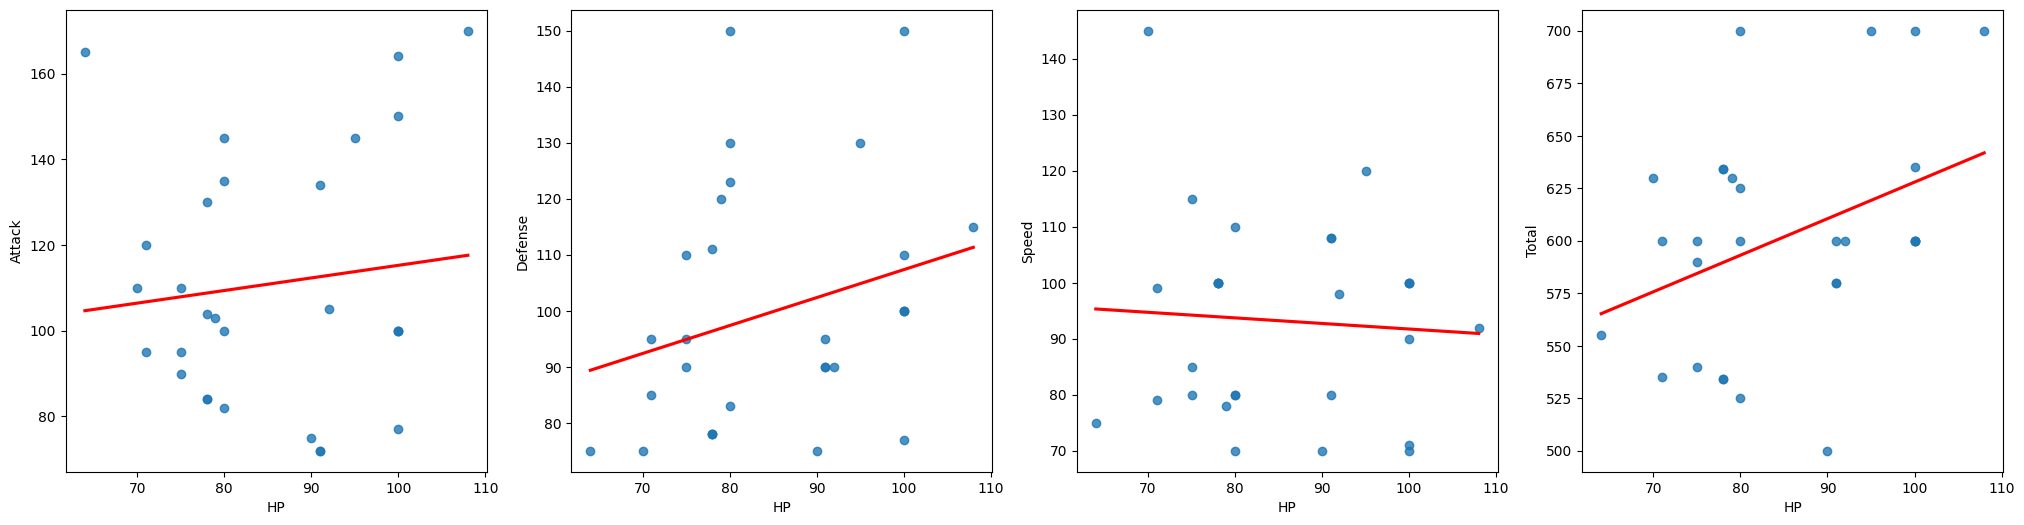

In [32]:
fig,(ax,ax1,ax2,ax3) = plt.subplots(ncols = 4,figsize=(25,6))

sns.regplot(x=Best_Pokemons['HP'], y=Best_Pokemons['Attack'], ci=None, data=df, line_kws = {"color": "red"},ax = ax)
sns.regplot(x=Best_Pokemons['HP'], y=Best_Pokemons['Defense'], ci=None, data=df, line_kws = {"color": "red"},ax = ax1)
sns.regplot(x=Best_Pokemons['HP'], y=Best_Pokemons['Speed'], ci=None, data=df, line_kws = {"color": "red"},ax = ax2)
sns.regplot(x=Best_Pokemons['HP'], y=Best_Pokemons['Total'], ci=None, data=df, line_kws = {"color": "red"},ax = ax3)

# Comparing Two Pokemons

In [33]:
def compare2pokemon(x,y):
    x = df[df["Name"] == x]
    y = df[df["Name"] == y]

    trace0 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = x.Name.values[0]
    )

    trace1 = go.Scatterpolar(
      r = [y['HP'].values[0],y['Attack'].values[0],y['Defense'].values[0],y['Sp. Atk'].values[0],y['Sp. Def'].values[0],y['Speed'].values[0],y["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = y.Name.values[0]
    )

    data = [trace0, trace1]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = False,
          range = [0, 150]
        )
      ),
      showlegend = True,
      title = "{} vs {}".format(x.Name.values[0],y.Name.values[0])
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = "Two Pokemon stats")

In [34]:
compare2pokemon("Pikachu","Vanilluxe")